In [1]:
# https://github.com/GeospatialPython/pyshp#reading-shapefiles-from-local-files

# import shapefile


# Import modules

In [2]:
# https://pygis.io/docs/e_interpolation.html?highlight=voronoi
# Import modules
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.spatial import Voronoi, voronoi_plot_2d
from shapely.geometry import box
from shapely.geometry import Polygon, Point


# Download GIS data

In [3]:
# https://stackoverflow.com/questions/5710867/downloading-and-unzipping-a-zip-file-without-writing-to-disk

# importing necessary modules
import requests
import zipfile
from io import BytesIO
import os

# https://pythonguides.com/download-zip-file-from-url-using-python/

def downloadzip(url, path_extraction):

    import zipfile

    # Split URL to get the file name
    filename = url.split('/')[-1]

    # Downloading the file by sending the request to the URL
    req = requests.get(url)
    print('Downloading Completed')

    # extracting the zip file contents
    zipfile= zipfile.ZipFile(BytesIO(req.content))
    zipfile.extractall(path_extraction)


In [4]:
wdir = os.getcwd()

# check for extraction directories existence
if not os.path.isdir('SHP'):
    os.makedirs('SHP')

    
SHP_dir = wdir + '/SHP'

os.chdir(SHP_dir)

## Basins polygons 

In [5]:
# Load data

# https://spatialreference.org/ref/epsg/3763/
# proj = 'EPSG:3763'
proj = 3763


# Source of data
# https://sniamb.apambiente.pt/
# https://sniamb.apambiente.pt/content/geo-visualizador 


# Basins boundaries
# https://sniambgeoportal.apambiente.pt/geoportal/catalog/search/resource/details.page?uuid={978FF2AE-A9AC-44BA-AA8B-1EEDF1B4C90B}
# https://sniambgeoviewer.apambiente.pt/GeoDocs/shpzips/AtAgua_Bacias_bacias_snirh_PC.zip


#Defining the zip file URL
url = 'https://sniambgeoviewer.apambiente.pt/GeoDocs/shpzips/AtAgua_Bacias_bacias_snirh_PC.zip'

# path for extraction foldr
SHP_dir = wdir + '/SHP'

downloadzip(url, SHP_dir)


path_to_rb = SHP_dir + '/AtAgua_Bacias_bacias_snirh_PC.shp'
gdf_basins = gpd.read_file(path_to_rb, crs = proj )


gdf_basins.head()

,nome,areakm2,st_area_sh,st_length_,geometry
0,Ancora e Ribeiras Costeiras,128.8,1.287704e+08,7.703320e+04,"POLYGON ((-61001.371 242767.568, -60990.090 24..."
1,Arade,976.6,9.765606e+08,2.146028e+05,"POLYGON ((-9136.213 -246697.533, -9105.223 -24..."
2,Ave,1390.7,1.390621e+09,2.379512e+05,"POLYGON ((-2453.821 219994.451, -2440.619 2200..."
3,Cávado e Ribeiras Costeiras,1664.3,1.664181e+09,3.514721e+05,"POLYGON ((-48096.669 196089.532, -48081.123 19..."
4,Douro,18640.5,1.863931e+10,1.014734e+06,"POLYGON ((95993.875 256592.543, 96515.647 2564..."


In [6]:
gdf_basins.dtypes

nome            object
areakm2        float64
st_area_sh     float64
st_length_     float64
geometry      geometry
dtype: object

In [7]:

# Create a copy of basins dataset
basins_dissolved = gdf_basins.copy()

# Add a field with constant value of 1
basins_dissolved["constant"] = 1

# Dissolve all counties to create one polygon
basins_dissolved = basins_dissolved.dissolve(by = "constant").reset_index(drop = True)

## Weather stations points

In [8]:
# weather stations network
# https://sniambgeoportal.apambiente.pt/geoportal/catalog/search/resource/details.page?uuid={53334169-EDFA-4B4E-A096-B5FCA355564A}
# https://sniambgeoviewer.apambiente.pt/GeoDocs/shpzips/AtAgua_Meteo_METEO_NET_PC.zip

#Defining the zip file URL
url = 'https://sniambgeoviewer.apambiente.pt/GeoDocs/shpzips/AtAgua_Meteo_METEO_NET_PC.zip'


downloadzip(url, SHP_dir)

path_to_ws = SHP_dir + '/AtAgua_Meteo_METEO_NET_PC.shp'
gdf_stations = gpd.read_file(path_to_ws, crs = proj)

# type casting
gdf_stations['id'] = gdf_stations['id'].astype('int')

gdf_stations.head()

,id,codigo,nome,tipo,estado,telemetria,m,p,latitude,longitude,altitude,baciahid,ine_code,freguesia,concelho,distrito,cmilitar,notas,url,geometry
0,920685364,01F/01UG,FRIESTAS,UDOGRÁFICA,ACTIVA,NÃ,164630.296,563988.974,42.045,-8.560,32.0,MINHO,160806,FRIESTAS,VALENÇA,VIANA DO CASTELO,2,None,http://snirh.pt/snirh/_dadosbase/site/simplex....,POINT (-35370.618 263980.803)
1,920685912,01F/02UG,VALENÇA,UDOGRÁFICA,ACTIVA,NÃ,157640.549,560478.843,42.013,-8.645,15.0,MINHO,160801,ARÃO,VALENÇA,VIANA DO CASTELO,2,None,http://snirh.pt/snirh/_dadosbase/site/simplex....,POINT (-42359.994 260470.659)
2,920685760,01G/02UG,PARADA (MONÇÃO),UDOGRÁFICA,ACTIVA,NÃ,172738.965,561392.218,42.022,-8.462,246.0,MINHO,160419,PARADA,MONÇÃO,VIANA DO CASTELO,3,None,http://snirh.pt/snirh/_dadosbase/site/simplex....,POINT (-27262.261 261384.424)
3,920685474,01G/03UG,MERUFE,UDOGRÁFICA,ACTIVA,NÃ,178811.676,561001.260,42.018,-8.389,162.0,MINHO,160415,MERUFE,MONÇÃO,VIANA DO CASTELO,3,None,http://snirh.pt/snirh/_dadosbase/site/simplex....,POINT (-21189.802 260993.623)
4,920686036,01H/02G,PORTELINHA,UDOGRÁFICA,ACTIVA,SIM,196759.617,564673.055,42.052,-8.172,1018.0,LIMA,160302,CASTRO LABOREIRO,MELGAÇO,VIANA DO CASTELO,4,None,http://snirh.pt/snirh/_dadosbase/site/simplex....,POINT (-3242.799 264665.502)


In [9]:
gdf_stations.columns

Index(['id', 'codigo', 'nome', 'tipo', 'estado', 'telemetria', 'm', 'p',
       'latitude', 'longitude', 'altitude', 'baciahid', 'ine_code',
       'freguesia', 'concelho', 'distrito', 'cmilitar', 'notas', 'url',
       'geometry'],
      dtype='object')

In [10]:
# Drop un-needed columns 

col2drop = ['tipo', 'estado', 'telemetria', 'm', 'p',
       'latitude', 'longitude', 'ine_code',
       'freguesia', 'concelho', 'distrito', 'cmilitar', 'notas']
       
gdf_stations = gdf_stations.drop(col2drop, axis = 1)



In [11]:
gdf_stations.head()

,id,codigo,nome,altitude,baciahid,url,geometry
0,920685364,01F/01UG,FRIESTAS,32.0,MINHO,http://snirh.pt/snirh/_dadosbase/site/simplex....,POINT (-35370.618 263980.803)
1,920685912,01F/02UG,VALENÇA,15.0,MINHO,http://snirh.pt/snirh/_dadosbase/site/simplex....,POINT (-42359.994 260470.659)
2,920685760,01G/02UG,PARADA (MONÇÃO),246.0,MINHO,http://snirh.pt/snirh/_dadosbase/site/simplex....,POINT (-27262.261 261384.424)
3,920685474,01G/03UG,MERUFE,162.0,MINHO,http://snirh.pt/snirh/_dadosbase/site/simplex....,POINT (-21189.802 260993.623)
4,920686036,01H/02G,PORTELINHA,1018.0,LIMA,http://snirh.pt/snirh/_dadosbase/site/simplex....,POINT (-3242.799 264665.502)


In [12]:
# Get X and Y coordinates of rainfall points
x_rain = gdf_stations["geometry"].x
y_rain = gdf_stations["geometry"].y

# Create list of XY coordinate pairs
coords_rain = [list(xy) for xy in zip(x_rain, y_rain)]

## Plot raw shapefiles

Text(244.7668945825805, 0.5, 'Y [m]')

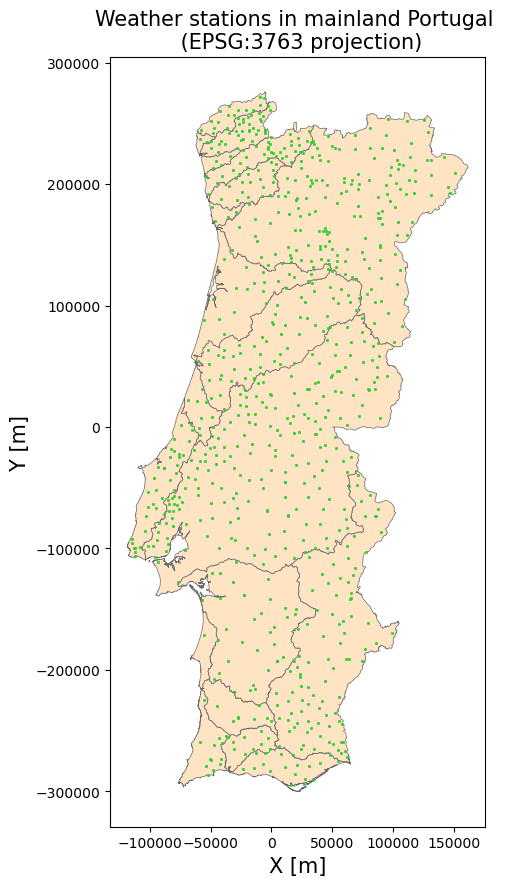

In [13]:
# Create subplots
fig, ax = plt.subplots(1, 1, figsize = (10, 10))

# Stylize plots
plt.style.use('bmh')

# Plot data
gdf_basins.plot(ax = ax, color = 'bisque', edgecolor = 'dimgray')
gdf_stations.plot(ax = ax, marker = 'o', color = 'limegreen', markersize = 3)
# Set title
ax.set_title(f'Weather stations in mainland Portugal \n (EPSG:{proj} projection)', fontdict = {'fontsize': '15', 'fontweight' : '3'})
ax.set_xlabel(f'X [m]', fontdict = {'fontsize': '15', 'fontweight' : '3'})
ax.set_ylabel(f'Y [m]', fontdict = {'fontsize': '15', 'fontweight' : '3'})

# Thiessen Polygons (Voronoi Diagrams)

In [14]:
# Extend extent of counties feature by using buffer
basins_buffer = gdf_basins.buffer(100000)

# Get extent of buffered input feature
min_x_tp, min_y_tp, max_x_tp, max_y_tp = basins_buffer.total_bounds

# Use extent to create dummy points and add them to list of coordinates
coords_tp = coords_rain + [[min_x_tp, min_y_tp], [max_x_tp, min_y_tp],
                                 [max_x_tp, max_y_tp], [min_x_tp, max_y_tp]]

# Compute Voronoi diagram
tp = Voronoi(coords_tp)

# Create empty list of hold Voronoi polygons
tp_poly_list = []

# Create a polygon for each region
# 'regions' attribute provides a list of indices of the vertices (in the 'vertices' attribute) that make up the region
# Source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.Voronoi.html
for region in tp.regions:

    # Ignore region if -1 is in the list (based on documentation)
    if -1 in region:

        # Return to top of loop
        continue

    # Otherwise, pass
    else:
        pass

    # Check that region list has values in it
    if len(region) != 0:

        # Create a polygon by using the region list to call the correct elements in the 'vertices' attribute
        tp_poly_region = Polygon(list(tp.vertices[region]))

        # Append polygon to list
        tp_poly_list.append(tp_poly_region)

    # If no values, return to top of loop
    else:
        continue

# Create GeoDataFrame from list of polygon regions
tp_polys = gpd.GeoDataFrame(tp_poly_list, columns = ['geometry'], crs = proj)

# Clip polygon regions to the counties boundary
tp_polys_clipped = gpd.clip(tp_polys, basins_dissolved)

In [15]:
# If rainfall point within the polygon, assign that rainfall value to the polygon
tp_polys_clipped_values = gpd.sjoin(gdf_stations, tp_polys_clipped, how = "right", op = 'within')

# Drop un-needed column
tp_polys_clipped_values = tp_polys_clipped_values.drop("index_left", axis = 1)

# Display head of attribute table
print("Attribute Table: Thiessen Polygon Interpolated Values")
display(tp_polys_clipped_values.head())

Attribute Table: Thiessen Polygon Interpolated Values


,id,codigo,nome,altitude,baciahid,url,geometry
0,920686136.0,15D/03UG,MACEIRA (LIS),168.0,LIS/RIBEIRAS COSTEIRAS,http://snirh.pt/snirh/_dadosbase/site/simplex....,"POLYGON ((-71569.604 11744.389, -66812.823 123..."
1,920752542.0,31I/03U,POÇO DE BOLIQUEIME,24.0,RIBEIRAS DO ALGARVE,http://snirh.pt/snirh/_dadosbase/site/simplex....,"POLYGON ((-8619.531 -284440.002, 1646.298 -275..."
2,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((42504.285 -286146.206, 42444.3..."
3,920685636.0,31K/02UG,QUELFES,24.0,RIBEIRAS DO ALGARVE,http://snirh.pt/snirh/_dadosbase/site/simplex....,"POLYGON ((22629.534 -290665.880, 25777.525 -28..."
4,920752544.0,31J/03U,ARABIA,1.0,RIBEIRAS DO ALGARVE,http://snirh.pt/snirh/_dadosbase/site/simplex....,"MULTIPOLYGON (((21367.221 -294774.349, 21326.7..."


## Thiessen polygons - Portugal

Text(249.62800569369165, 0.5, 'Y [m]')

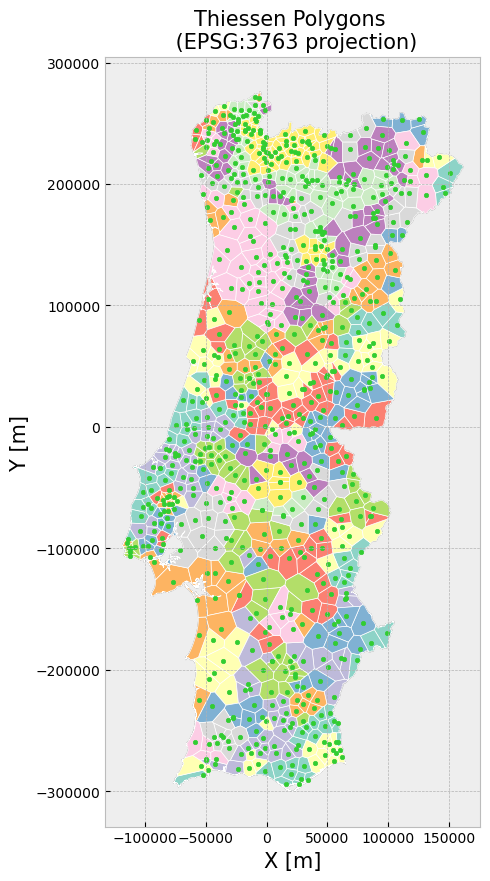

In [16]:
# Create subplots
fig, ax = plt.subplots(1, 1, figsize = (10, 10))

# Stylize plots
plt.style.use('bmh')

# Plot data
basins_dissolved.plot(ax = ax, color = 'none', edgecolor = 'dimgray')
tp_polys_clipped.plot(ax = ax, cmap = 'Set3', edgecolor = 'white', linewidth = 0.5)
gdf_stations.plot(ax = ax, marker = 'o', color = 'limegreen', markersize = 10)

# Iterate through each rainfall train point to add a label with its value to the plot
# for index, row in gdf_stations.iterrows():
#     ax.annotate(row.codigo, (row.geometry.x, row.geometry.y), fontsize=5)

# Set title
ax.set_title(f'Thiessen Polygons \n (EPSG:{proj} projection)', fontdict = {'fontsize': '15', 'fontweight' : '3'})
ax.set_xlabel(f'X [m]', fontdict = {'fontsize': '15', 'fontweight' : '3'})
ax.set_ylabel(f'Y [m]', fontdict = {'fontsize': '15', 'fontweight' : '3'})

# Mondego river basin

In [17]:

# Create a copy of basins dataset
gdf_Mondego_rb = gdf_basins.copy()

# Selects the Mondego river basins polygons
gdf_Mondego_rb = gdf_Mondego_rb[gdf_Mondego_rb['nome'] =='Mondego']


# https://geopandas.org/en/stable/docs/user_guide/geometric_manipulations.html?highlight=intersection
# Union of polygons
Mondego_rb = gdf_Mondego_rb.unary_union

# The Mondego river basin has two polygons, so we have to join them in a multipolygon 
# to avoid splitting the Thiessen coeficcients into two parts, which create problems in the next steps
# # Dissolve all basins to create one polygon
gdf_Mondego_rb = gdf_Mondego_rb.dissolve(by = "nome").reset_index(drop = True)

In [18]:
gdf_Mondego_rb

,geometry,areakm2,st_area_sh,st_length_
0,"MULTIPOLYGON (((-60401.385 53060.739, -60377.1...",6634.0,6.633629e+09,600085.004991


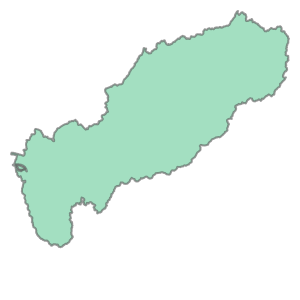

In [19]:
Mondego_rb

In [20]:
# Extract the bounding box coordinates
x_min, y_min, x_max, y_max = Mondego_rb.bounds
x_min, y_min, x_max, y_max


(-64078.430300000124,
 12154.131200000644,
 74492.61070000008,
 129937.99220000021)

In [21]:
# transform coordinates to lat/lon
from pyproj import Proj, transform

inProj = Proj(init='epsg:3763')
outProj = Proj(init='epsg:4326')                # https://epsg.io/4326
x = [x_min, x_max]
y = [y_min, y_max]
Mondego_lat_long = transform(inProj,outProj,x,y)
print (Mondego_lat_long)

([-8.881045686405937, -7.249919426235665], [39.77531605114493, 40.8350735869894])


c:\ProgramData\Anaconda3\envs\rioxarray_env\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
c:\ProgramData\Anaconda3\envs\rioxarray_env\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\Asus\AppData\Local\Temp\ipykernel_17308\4151154240.py:8: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading

In [31]:
# Clip the Thiessen polygons with the Mondego river basin limits
gdf_Mondego_tp = gpd.sjoin(tp_polys_clipped_values, gdf_Mondego_rb, how = "inner", op = 'intersects')

# # Drop un-needed columns
gdf_Mondego_tp = gdf_Mondego_tp.drop(['index_right', ], axis = 1)


# # Rename columns
gdf_Mondego_tp = gdf_Mondego_tp.rename(columns = {"nome": "Name"})

In [33]:
gdf_Mondego_tp.head()

,id,codigo,Name,altitude,baciahid,url,geometry,areakm2,st_area_sh,st_length_
24,920684982.0,15F/01UG,ALBERGARIA DOS DOZE,249.0,MONDEGO,http://snirh.pt/snirh/_dadosbase/site/simplex....,"POLYGON ((-34288.793 10516.279, -41368.495 745...",6634.0,6.633629e+09,600085.004991
35,920685460.0,14E/02UG,MATA DA BIDOEIRA,95.0,LIS/RIBEIRAS COSTEIRAS,http://snirh.pt/snirh/_dadosbase/site/simplex....,"POLYGON ((-54836.896 26101.258, -47039.242 159...",6634.0,6.633629e+09,600085.004991
49,920685644.0,11N/01UG,RAMELA,667.0,TEJO,http://snirh.pt/snirh/_dadosbase/site/simplex....,"POLYGON ((82617.675 94387.833, 77615.254 84362...",6634.0,6.633629e+09,600085.004991
65,920685434.0,13E/02UG,LOURIÇAL,37.0,MONDEGO,http://snirh.pt/snirh/_dadosbase/site/simplex....,"POLYGON ((-63227.246 41901.940, -57718.031 452...",6634.0,6.633629e+09,600085.004991
66,920685736.0,13D/04UG,CASAL DO RATO,22.0,MONDEGO,http://snirh.pt/snirh/_dadosbase/site/simplex....,"MULTIPOLYGON (((-65243.261 41594.381, -65234.0...",6634.0,6.633629e+09,600085.004991


In [34]:
# Creates a set of weather stations whose Thiessen polygon intersects the Mondego river basin
gdf_Mondego_stations = gpd.sjoin(gdf_stations, gdf_Mondego_tp, how = "inner", op = 'within')

# Drop un-needed columns
gdf_Mondego_stations = gdf_Mondego_stations.drop(['index_right', "id_right", 'codigo_right', 'Name', 'baciahid_right', 'altitude_right', 'areakm2', 'st_area_sh', 'st_length_' ], axis = 1)

# Rename columns
gdf_Mondego_stations = gdf_Mondego_stations.rename(columns = {'id_left': 'id','codigo_left': 'codigo', "nome": "Name", 'baciahid_left': 'Basin', 'altitude_left': 'Elevation'})

In [35]:
gdf_Mondego_stations.head()

,id,codigo,Name,Elevation,Basin,url_left,geometry,url_right
259,920685638,08L/07UG,QUINTA DA FUMADINHA,803.0,VOUGA/RIBEIRAS COSTEIRAS,http://snirh.pt/snirh/_dadosbase/site/simplex....,POINT (46743.710 129813.787),http://snirh.pt/snirh/_dadosbase/site/simplex....
270,920685854,09N/01UG,TAMANHOS,766.0,MONDEGO,http://snirh.pt/snirh/_dadosbase/site/simplex....,POINT (68936.214 121874.720),http://snirh.pt/snirh/_dadosbase/site/simplex....
273,920685164,09H/01UG,CAMPIA,448.0,VOUGA/RIBEIRAS COSTEIRAS,http://snirh.pt/snirh/_dadosbase/site/simplex....,POINT (-7065.211 111653.315),http://snirh.pt/snirh/_dadosbase/site/simplex....
277,920685696,09I/01C,SÃO PEDRO DO SUL,182.0,VOUGA/RIBEIRAS COSTEIRAS,http://snirh.pt/snirh/_dadosbase/site/simplex....,POINT (5328.898 120073.342),http://snirh.pt/snirh/_dadosbase/site/simplex....
279,920685152,09J/03UG,CALDE,505.0,VOUGA/RIBEIRAS COSTEIRAS,http://snirh.pt/snirh/_dadosbase/site/simplex....,POINT (18354.606 123184.619),http://snirh.pt/snirh/_dadosbase/site/simplex....


In [36]:
len(gdf_Mondego_stations)

83

Text(61.33333333333333, 0.5, 'Y [m]')

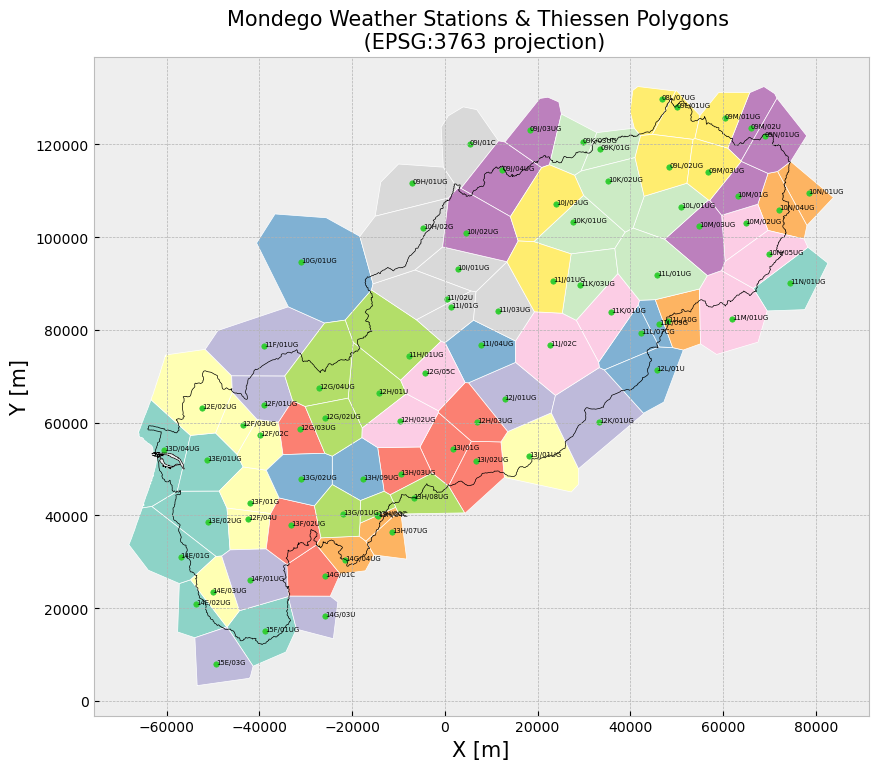

In [37]:
# Create subplots
fig, ax = plt.subplots(1, 1, figsize = (10, 10))

# Stylize plots
plt.style.use('bmh')

# Plot data
# basins_dissolved.plot(ax = ax, color = 'none', edgecolor = 'dimgray')
gdf_Mondego_tp.plot(ax = ax, cmap = 'Set3', edgecolor = 'white', linewidth = 0.5)
gdf_Mondego_stations.plot(ax = ax, marker = 'o', color = 'limegreen', markersize = 15)
gdf_Mondego_rb.plot(ax = ax, color = 'none', edgecolor = 'black', linewidth = 0.5)

# Iterate through each rainfall train point to add a label with its value to the plot
for index, row in gdf_Mondego_stations.iterrows():
    ax.annotate(row.codigo, (row.geometry.x, row.geometry.y), fontsize=5)

# Set title
# ax.set_title('Mondego Weather Stations & Thiessen Polygons', fontdict = {'fontsize': '15', 'fontweight' : '3'})
ax.set_title(f'Mondego Weather Stations & Thiessen Polygons \n (EPSG:{proj} projection)', fontdict = {'fontsize': '15', 'fontweight' : '3'})
ax.set_xlabel(f'X [m]', fontdict = {'fontsize': '15', 'fontweight' : '3'})
ax.set_ylabel(f'Y [m]', fontdict = {'fontsize': '15', 'fontweight' : '3'})

In [38]:
# Save geopandas df to files

os.chdir(wdir + '/SHP')


gdf_Mondego_tp.to_file('gdf_Mondego_tp.shp')  
gdf_Mondego_stations.to_file('gdf_Mondego_stations.shp')  
gdf_Mondego_rb.to_file('gdf_Mondego_rb.shp')  

c:\ProgramData\Anaconda3\envs\rioxarray_env\lib\site-packages\geopandas\io\file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
c:\ProgramData\Anaconda3\envs\rioxarray_env\lib\site-packages\geopandas\io\file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
c:\ProgramData\Anaconda3\envs\rioxarray_env\lib\site-packages\geopandas\io\file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


# Download data from SNIRH (www.snirh.pt)

In [39]:
# https://snirh.apambiente.pt/snirh/_dadosbase/site/paraCSV/dados_csv.php?sites=920685364&pars=413026594&tmin=01/10/1980&tmax=21/12/2021&formato=tsv


# returns to home diretory
os.chdir(wdir)

# check for extraction directories existence
if not os.path.isdir('SNIRH'):
    os.makedirs('SNIRH')
    
SNIRH_dir = wdir + '/SNIRH'

os.chdir(SNIRH_dir)

date_init = '01/10/1950'
date_end = '30/09/2021'

# list of id for relevant weather stations
l_ids = gdf_Mondego_stations.id.astype(int)

# for iter, row in gdf_Mondego_stations.iterrows():
for i in l_ids:

    id =  str(i)
    
    url=f'https://snirh.apambiente.pt/snirh/_dadosbase/site/paraCSV/dados_csv.php?sites={id}&pars=413026594&tmin={date_init}&tmax={date_end}&formato=csv'
    # wget.download(url)

    # https://www.tutorialspoint.com/downloading-files-from-web-using-python
    # Downloading the file by sending the request to the URL
    r = requests.get(url)

    fname = id + '.csv'
    open(fname, 'wb').write(r.content)


print('Downloading Completed')

# returns to home diretory
os.chdir(wdir)

# Loads SNIRH csv files to a dataframe

In [40]:
# changes working directory
os.chdir(SNIRH_dir)

os.getcwd()


'h:\\My Drive\\MCED\\TAAC_VC_PROJECT\\SNIRH'

In [41]:
# function to read csv files from SNIRH
#
import pandas as pd

def load_SNIRH_pt(id):
    fname = str(id) + '.csv'

    col_names = ['date', id, 'flag', 'emptycol']
    # https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
    # https://stackoverflow.com/questions/5552555/unicodedecodeerror-invalid-continuation-byte
    df = pd.read_csv(fname,  names = col_names, skiprows = 4, encoding='latin-1')

    # drops the last columns which are not necessary
    df = df.drop(['flag', 'emptycol'], axis = 1)

    # drops the last row
    n = 1
    df.drop(df.tail(n).index, inplace=True) # drop last n rows


    # converts date column to datetime format
    # https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
    df['date'] = pd.to_datetime(df['date'], format = '%d/%m/%Y %H:%M')

    return df

In [42]:
# https://pandas.pydata.org/docs/reference/api/pandas.date_range.html
# https://pynative.com/python-datetime-format-strftime/
# https://www.digitalocean.com/community/tutorials/python-string-to-datetime-strptime


# create a dataframe with dates within specified range

from datetime import datetime

# start and end date
startdate = datetime.strptime(date_init, '%d/%m/%Y')
enddate = datetime.strptime(date_end, '%d/%m/%Y')

df_snirh = pd.DataFrame(pd.date_range(start=startdate, end=enddate), columns = ['date'])
df_snirh['date'] = df_snirh['date'] +  pd.DateOffset(hours=9)
df_snirh

,date
0,1950-10-01 09:00:00
1,1950-10-02 09:00:00
2,1950-10-03 09:00:00
3,1950-10-04 09:00:00
4,1950-10-05 09:00:00
...,...
25928,2021-09-26 09:00:00
25929,2021-09-27 09:00:00
25930,2021-09-28 09:00:00
25931,2021-09-29 09:00:00


In [43]:
# loops all files and merge to common dataframe

l_failures = []

for id in l_ids:
    

    try:
        df = load_SNIRH_pt(id)
        df_snirh = df_snirh.merge(df, how = 'left', on = 'date')
    except:
        l_failures.append(id)
        print(f'Failed to read file: {id}')

Failed to read file: 920752456
Failed to read file: 920752638
Failed to read file: 920752398
Failed to read file: 920752520


In [44]:
# stations who failed to download because they don't have data for this period
l_failures = [920752456, 920752638, 920752398, 920752520]

In [45]:
gdf_failures = gdf_stations[gdf_stations['id'].isin(l_failures)]

In [46]:
for iter, row in gdf_failures.iterrows():
    print(row['url'])

http://snirh.pt/snirh/_dadosbase/site/simplex.php?FILTRA_COVER=920123704&FILTRA_SIMBOLO=11I/02U
http://snirh.pt/snirh/_dadosbase/site/simplex.php?FILTRA_COVER=920123704&FILTRA_SIMBOLO=12L/01U
http://snirh.pt/snirh/_dadosbase/site/simplex.php?FILTRA_COVER=920123704&FILTRA_SIMBOLO=14E/01G
http://snirh.pt/snirh/_dadosbase/site/simplex.php?FILTRA_COVER=920123704&FILTRA_SIMBOLO=14G/03U


In [47]:
df_snirh.describe()

,920685638,920685854,920685164,920685696,920685152,920685438,920685794,920685128,920684964,920685348,...,920685374,920685146,920685318,920685460,920686122,920685604,920685978,920686004,920685180,920684982
count,8060.000000,11298.000000,21279.000000,11248.000000,9986.000000,9782.000000,17259.000000,6584.000000,22947.000000,9698.000000,...,21097.000000,11943.000000,22709.000000,9775.000000,10387.000000,24276.000000,7953.000000,10475.000000,10139.000000,9709.000000
mean,3.206625,2.053018,4.861413,2.807904,2.715281,2.668984,2.973876,2.909462,3.316159,2.380645,...,3.007110,2.922306,3.592639,2.145033,2.247136,2.484883,2.652986,2.462358,2.275599,2.516789
std,12.720982,6.072270,12.473327,7.213737,7.114511,7.201875,7.869764,7.573386,8.345314,6.298432,...,7.694927,8.015825,9.398738,6.573687,5.591782,6.452925,6.775378,6.696651,5.798315,6.806033
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.300000,0.200000,2.700000,1.300000,0.700000,0.800000,1.200000,0.100000,2.200000,0.700000,...,1.500000,0.400000,1.400000,0.600000,1.000000,1.000000,1.200000,0.500000,1.000000,0.900000
max,281.600000,115.000000,180.000000,106.000000,87.300000,91.300000,107.000000,68.000000,148.200000,85.000000,...,121.800000,90.300000,140.000000,156.000000,58.900000,104.800000,89.500000,95.000000,68.800000,216.800000


In [48]:
df_snirh.to_csv('SNIRH_daily_rainfall.csv')